In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [15]:
class KMeans:
    def __init__(self, n_clusters=2): 
        self.k = n_clusters
        self.centroids = None

    @staticmethod
    def euclideen_method(data_point,  centroid):
        return np.sqrt(np.sum((centroid - data_point) **  2, axis=1))
   

    def fit(self, X, max_iterations = 200):
        # Initialize centroids randomly from data points
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        
        for _ in range(max_iterations):
            y = []

            for data_point in X:
                euclideen_distance = KMeans.euclideen_method(data_point, self.centroids)
                cluster_num = np.argmin(euclideen_distance)
                y.append(cluster_num)


            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if  len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=1)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)
        return y

In [16]:
random_points = np.random.randint(0, 100, (100, 2))

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit(random_points)

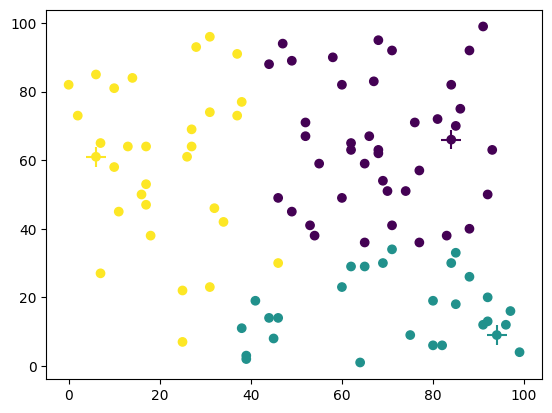

In [18]:
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker="+", s=200)
